# ASSIGNMENT - 2

### Problem Statement
Classification using Deep neural network

Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

In [1]:
from keras.datasets import imdb # type: ignore
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words= 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

np.int64(1)

In [4]:
print(type([max(sequence) for sequence in train_data]))
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
len(reverse_word_index)

88584

In [7]:
import numpy as np # type: ignore
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

xtrain = vectorize_sequences(train_data)
xtest = vectorize_sequences(test_data)

In [8]:
xtrain[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
xtrain.shape

(25000, 10000)

In [10]:
ytrain = np.asarray(train_labels).astype('float32')
ytest = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models # type: ignore
from keras import layers # type: ignore

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\asus\Documents\BE Computer Lab\DL Practical\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from keras import optimizers # type: ignore
from keras import losses # type: ignore
from keras import metrics # type: ignore

model.compile(optimizer= optimizers.RMSprop(learning_rate= 0.001),
              loss = losses.binary_crossentropy,
              metrics= [metrics.binary_accuracy])

In [14]:
xval = xtrain[:10000]
partial_xtrain = xtrain[10000:]

yval = ytrain[:10000]
partial_ytrain = ytrain[10000:]

In [15]:
history = model.fit(partial_xtrain,
                    partial_ytrain,
                    epochs=20,
                    batch_size= 512,
                    validation_data=(xval, yval))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - binary_accuracy: 0.6919 - loss: 0.6136 - val_binary_accuracy: 0.8473 - val_loss: 0.4257
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - binary_accuracy: 0.8926 - loss: 0.3610 - val_binary_accuracy: 0.8676 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - binary_accuracy: 0.9198 - loss: 0.2584 - val_binary_accuracy: 0.8875 - val_loss: 0.2898
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - binary_accuracy: 0.9331 - loss: 0.2062 - val_binary_accuracy: 0.8811 - val_loss: 0.2963
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - binary_accuracy: 0.9446 - loss: 0.1741 - val_binary_accuracy: 0.8873 - val_loss: 0.2807
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - binary_accuracy: 0.9583 - loss: 0.1414 - val_binary_accuracy: 0.8736 - val_loss: 0.3295
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - binary_accuracy: 0.9633 - loss: 0.1211 - val_binary_accuracy: 0.8847 - val_loss: 0.2915
Epoch 8/2

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [17]:
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

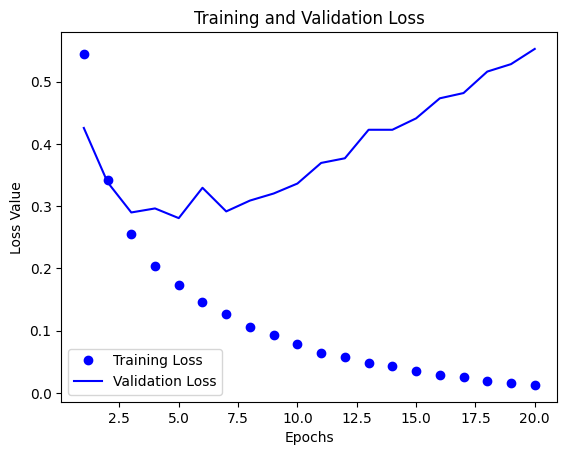

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss_values, 'b', label = "Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

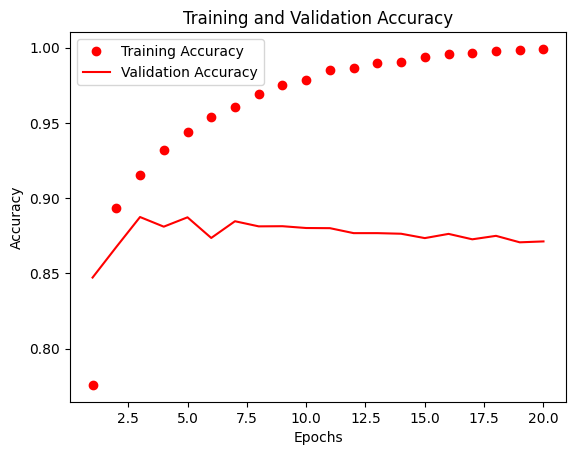

In [19]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'ro', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label = "Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model.fit(partial_xtrain,
          partial_ytrain,
          epochs= 3,
          batch_size= 512,
          validation_data=(xval,yval))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - binary_accuracy: 0.9989 - loss: 0.0098 - val_binary_accuracy: 0.8707 - val_loss: 0.5742
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - binary_accuracy: 0.9994 - loss: 0.0074 - val_binary_accuracy: 0.8698 - val_loss: 0.5967
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - binary_accuracy: 0.9998 - loss: 0.0058 - val_binary_accuracy: 0.8667 - val_loss: 0.6178


In [25]:
np.set_printoptions(suppress= True)
result = model.predict(xtest)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [26]:
result

array([[0.00997343],
       [1.        ],
       [0.8849751 ],
       ...,
       [0.00378484],
       [0.00772753],
       [0.95486695]], dtype=float32)

In [27]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [28]:
from sklearn.metrics import mean_absolute_error # type: ignore

# Example data
ytest = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.5


In [29]:
mae

0.5